In [76]:
#cargamos librerias
import numpy as np 
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score   
import pandas as pd 

In [77]:
#cargar archivo csv desde seaborn
#Convertir en dataframe
df_sydney= pd.read_csv("Sydney.csv")
df_sydney.head(5)

,Unnamed: 0,host_response_time,host_acceptance_rate,property_type,room_type,amenities,host_is_superhost,host_response_rate,host_acceptance_rate.1,host_listings_count,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,within a few hours,0,Entire rental unit,Entire home/apt,"[""Essentials"", ""Heating"", ""TV with standard ca...",f,100.0,89.6,1.0,...,4.92,4.97,4.97,4.87,4.90,1.0,1.0,0.0,0.0,0.94
1,1,within a few hours,100,Private room in home,Private room,"[""Fire extinguisher"", ""Outdoor furniture"", ""Sh...",t,100.0,100.0,3.0,...,4.92,4.97,4.97,4.87,4.90,2.0,0.0,2.0,0.0,0.94
2,2,within an hour,100,Entire rental unit,Entire home/apt,"[""Fire extinguisher"", ""Outdoor furniture"", ""Ro...",t,100.0,100.0,1.0,...,4.86,4.97,4.94,4.92,4.72,1.0,1.0,0.0,0.0,3.03
3,3,within a few hours,100,Private room in home,Private room,"[""Fire extinguisher"", ""Bed linens"", ""Indoor fi...",t,100.0,100.0,3.0,...,4.81,4.92,5.00,4.81,4.86,2.0,0.0,2.0,0.0,0.36
4,4,within a few hours,94,Entire rental unit,Entire home/apt,"[""Essentials"", ""Microwave"", ""Heating"", ""Stove""...",t,100.0,94.0,2.0,...,4.91,4.95,5.00,4.98,4.93,1.0,1.0,0.0,0.0,0.62


In [78]:
# Crear un nuevo DataFrame con las columnas específicas
df = df_sydney[['host_acceptance_rate', 'host_response_rate', 'host_total_listings_count', 'accommodates', 'reviews_per_month', 'price']]
df.head()

,host_acceptance_rate,host_response_rate,host_total_listings_count,accommodates,reviews_per_month,price
0,0,100.0,1.0,3.0,0.94,185.0
1,100,100.0,4.0,2.0,0.94,100.0
2,100,100.0,2.0,5.0,3.03,347.0
3,100,100.0,4.0,2.0,0.36,100.0
4,94,100.0,3.0,5.0,0.62,736.0


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_ol

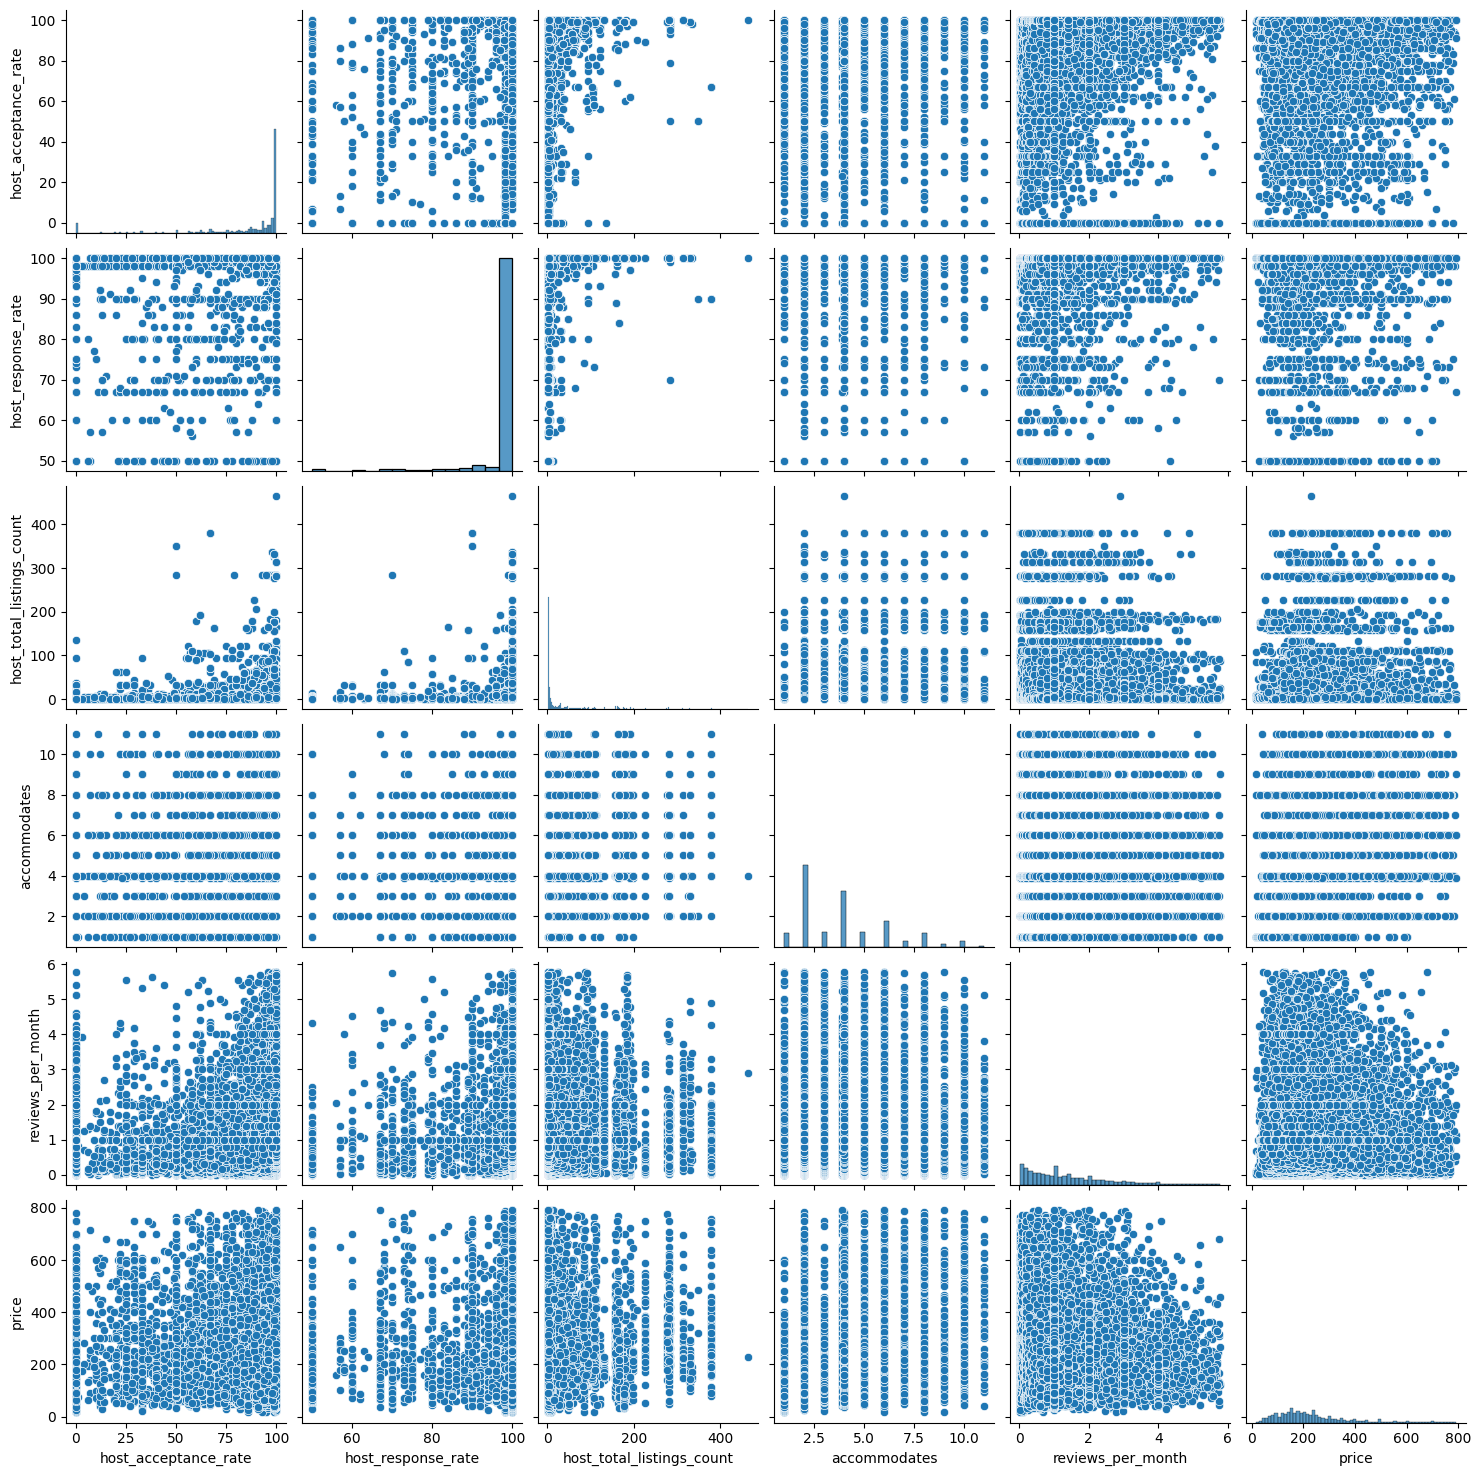

In [79]:
sns.pairplot(df)

In [80]:
df.columns

Index(['host_acceptance_rate', 'host_response_rate',
       'host_total_listings_count', 'accommodates', 'reviews_per_month',
       'price'],
      dtype='object')

** Usamos las siguientes ecuaciones como funciones de ajuste.**

        y = ax^2 + bx + c   ("Función cuadrática")

        y = a*exp(bx) + c   ("Función exponencial")

        y = 1/a*x           ("Función inversa")

        y = a*np.sin(x) + b ("Función senoidal")

        y = a*np.tan(x) + b ("Función tangencial")

        y = a*np.abs(x) + b*x + c (Función Valor absoluto)

        y = (a*x**2 + b)/ c*x (Función cociente entre polinomios)

        y = a*np.log(x) + b  (Función logaritmica)

        y = a*x + b*x + c*x (Función lineal con producto de coeficientes)

        y = 1/a*x**2  (Función cuadrática inversa)

        y = a/b*x**2 + c*x (Función polinomial inversa)

# Función Price

In [81]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['host_total_listings_count']]
Var_Dep= df['price']

In [82]:
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

***MODELO 1***

In [120]:
#Modelo cuadrático
def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

In [84]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df['host_total_listings_count'], df['price'])


In [85]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([ 1.32065033e-03, -2.35434360e-01,  2.35345037e+02])

In [86]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, df['host_total_listings_count'], df['price'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a * x ** 2 + b * x + c

In [87]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
#x= x.reshape(51, 1)
#y = y.reshape(51, 1)
#yfit1 = yfit1.reshape(51, 1)
yfit1

,host_total_listings_count
0,235.110923
1,234.424430
2,234.879450
3,234.424430
4,234.650619
...,...
15543,234.650619
15544,273.467852
15545,224.853212
15546,234.650619


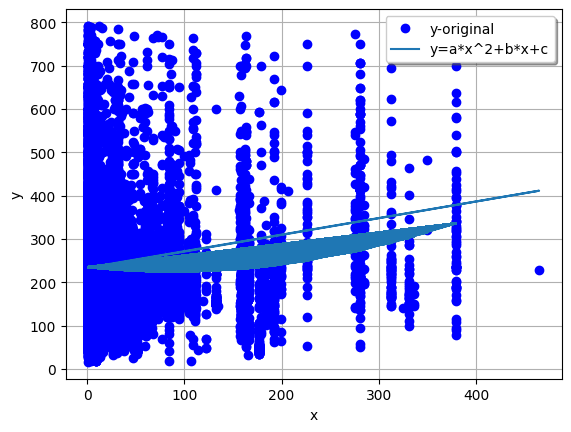

In [88]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [89]:
#Calculamos el coeficiente de determinación del modelo

R2 = r2_score(y, yfit1) 
R2

0.004955864506396068

***MODELO 2***

In [128]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['reviews_per_month']]
Var_Dep= df['price']

In [129]:
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

In [130]:
#Modelo exponencial
def func2(x, a, b, c):
    return a*np.exp(b*x)+c

In [131]:
#Ajustamos los parámetros de la función curve_fit
parametros2, covs2= curve_fit(func2, df['reviews_per_month'], df['price'])

In [132]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros2

array([-1.43148247e+05,  8.09064719e-05,  1.43398834e+05])

In [133]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros2, _ = curve_fit(func2, df['reviews_per_month'], df['price'])
a2, b2, c2 = parametros2[ 0 ], parametros2[ 1 ], parametros2[ 2 ]
yfit2 = a2*np.exp(x*b2)+c2

In [134]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
#yfit2 = yfit2.reshape(51, 1)
yfit2

,reviews_per_month
0,239.699638
1,239.699638
2,215.490165
3,246.417331
4,243.405990
...,...
15543,239.004686
15544,239.004686
15545,239.004686
15546,239.004686


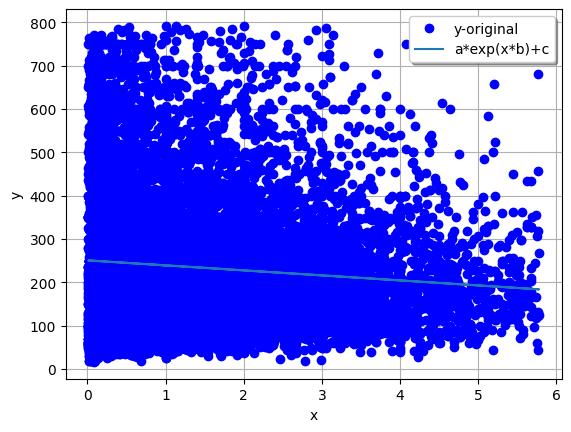

In [135]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit2, label="a*exp(x*b)+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [136]:
#Calculamos el coeficiente de determinación del modelo
R2 = r2_score(y, yfit2) 
R2

0.009096947986937165

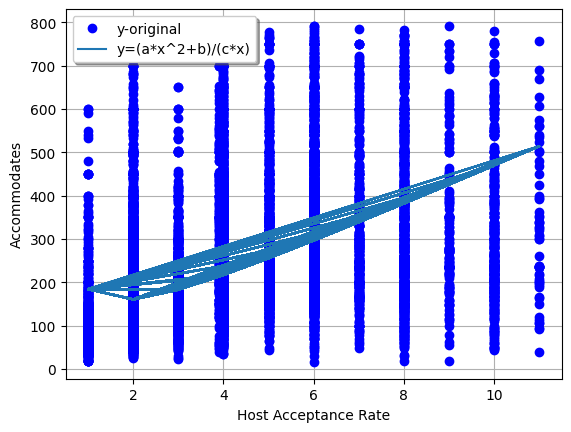

Coeficiente de determinación del modelo (R2): 0.13976326284432172


In [169]:
# Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep = df[['accommodates']]
Var_Dep = df['price']

# Redefinimos las variables
x = Vars_Indep
y = Var_Dep

# Definimos el nuevo modelo: y = (a*x^2 + b) / (c*x)
def func1(x, a, b, c):
    return (a * x**2 + b) / (c * x)

# Obtenemos los coeficientes del modelo de regresión no lineal
parametros, _ = curve_fit(func1, df['accommodates'], df['price'])

# Extraemos los coeficientes ajustados
a, b, c = parametros[0], parametros[1], parametros[2]

# Creamos el modelo de predicción con los parámetros obtenidos
yfit1 = (a * x**2 + b) / (c * x)

# Calculamos las predicciones y reestructuramos el vector de predicciones si es necesario
# yfit1 = yfit1.reshape(51, 1)  # Si es necesario ajustar las dimensiones
yfit1

# Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=(a*x^2+b)/(c*x)")
plt.xlabel('Host Acceptance Rate')
plt.ylabel('Accommodates')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

# Calculamos el coeficiente de determinación del modelo (R^2)
R2 = r2_score(y, yfit1)
print("Coeficiente de determinación del modelo (R2):", R2)


***MODELO 3***

# FUNCIÓN ACCOMMODATES

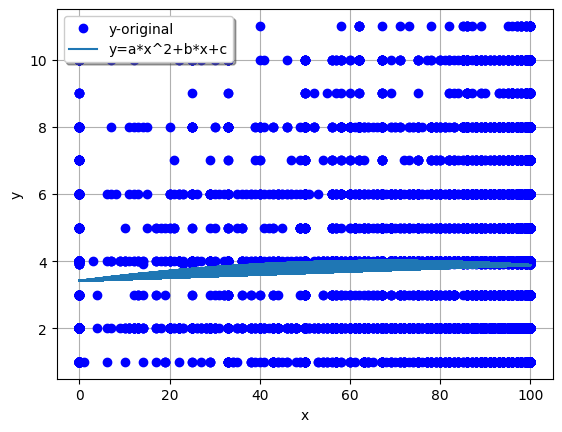

Coeficiente de correlación del modelo:  0.0025749062290431057


In [140]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['host_acceptance_rate']]
Var_Dep= df['accommodates']

#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, df['host_acceptance_rate'], df['accommodates'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a * x ** 2 + b * x + c

#Calculamos las predicciones y reestructuramos el vector de predicciones
#x= x.reshape(51, 1)
#y = y.reshape(51, 1)
#yfit1 = yfit1.reshape(51, 1)
yfit1

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo

R2 = r2_score(y, yfit1) 
print("Coeficiente de correlación del modelo: ",R2)

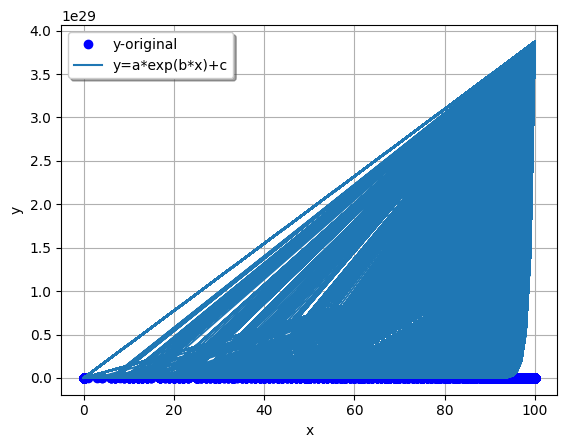

Coeficiente de correlación del modelo:  -1.0384475828394003e+58


In [141]:
# Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep = df[['host_acceptance_rate']]
Var_Dep = df['accommodates']

# Redefinimos las variables
x = Vars_Indep
y = Var_Dep

# Definimos el modelo exponencial a * exp(b * x) + c
def func1(x, a, b, c):
    return a * np.exp(b * x) + c

# Obtenemos los coeficientes del modelo de regresión no lineal
parametros

# Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, df['host_acceptance_rate'], df['accommodates'])
a, b, c = parametros[0], parametros[1], parametros[2]
yfit1 = a * np.exp(b * x) + c

# Calculamos las predicciones y reestructuramos el vector de predicciones
# x = x.reshape(51, 1)
# y = y.reshape(51, 1)
# yfit1 = yfit1.reshape(51, 1)
yfit1

# Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*exp(b*x)+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

# Calculamos el coeficiente de determinación del modelo
R2 = r2_score(y, yfit1)
print("Coeficiente de correlación del modelo: ", R2)



# FUNCIÓN host_response_rate

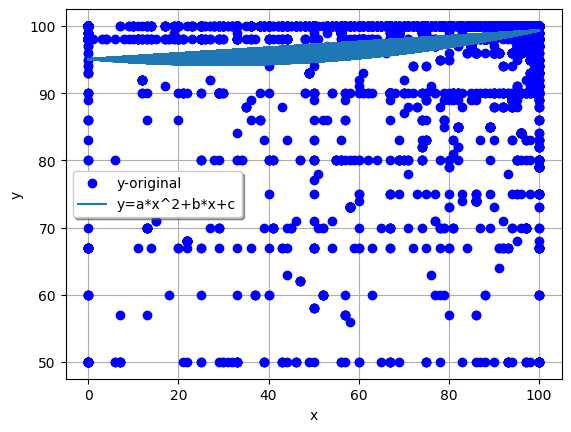

Coeficiente de correlación del modelo:  0.060695741592962094


In [146]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['host_acceptance_rate']]
Var_Dep= df['host_response_rate']

#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, df['host_acceptance_rate'], df['host_response_rate'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a * x ** 2 + b * x + c

#Calculamos las predicciones y reestructuramos el vector de predicciones
#x= x.reshape(51, 1)
#y = y.reshape(51, 1)
#yfit1 = yfit1.reshape(51, 1)
yfit1

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo

R2 = r2_score(y, yfit1) 
print("Coeficiente de correlación del modelo: ",R2)

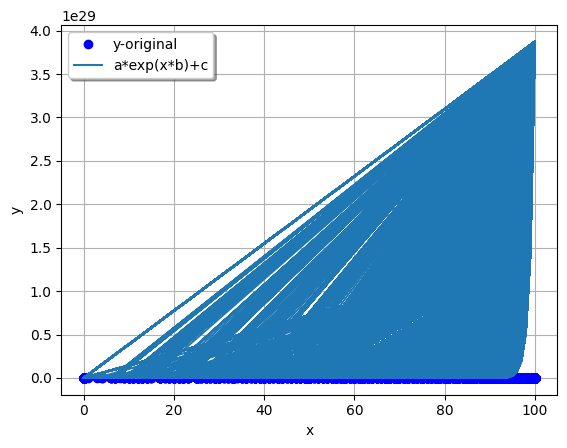

-1.2077913794266122e+57

In [148]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['host_acceptance_rate']]
Var_Dep= df['host_response_rate']

#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

#Modelo exponencial
def func2(x, a, b, c):
    return a*np.exp(b*x)+c

#Ajustamos los parámetros de la función curve_fit
parametros2, covs2= curve_fit(func2, df['host_acceptance_rate'], df['host_response_rate'])

#Obtenemos los coeficientes del modelo de regresión no lineal
parametros2

#Creamos el modelo de predicción con los parámetros obtenidos 
parametros2, _ = curve_fit(func2, df['host_acceptance_rate'], df['host_response_rate'])
a2, b2, c2 = parametros2[ 0 ], parametros2[ 1 ], parametros2[ 2 ]
yfit2 = a2*np.exp(x*b2)+c2

#Calculamos las predicciones y reestructuramos el vector de predicciones
#yfit2 = yfit2.reshape(51, 1)
yfit2

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit2, label="a*exp(x*b)+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R2 = r2_score(y, yfit2) 
R2

# FUNCIÓN host_acceptance_rate

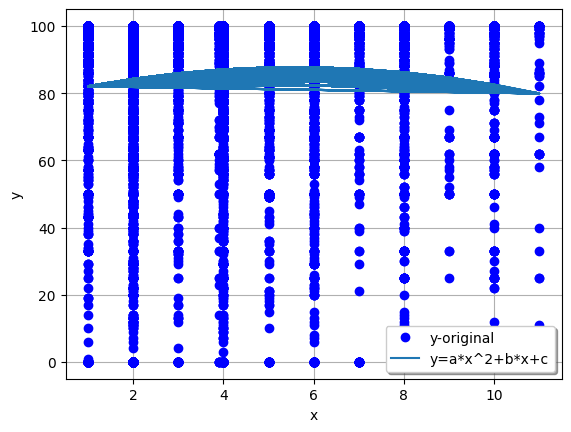

Coeficiente de correlación del modelo:  0.004924520140542121


In [149]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['accommodates']]
Var_Dep= df['host_acceptance_rate']

#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, df['accommodates'], df['host_acceptance_rate'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a * x ** 2 + b * x + c

#Calculamos las predicciones y reestructuramos el vector de predicciones
#x= x.reshape(51, 1)
#y = y.reshape(51, 1)
#yfit1 = yfit1.reshape(51, 1)
yfit1

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo

R2 = r2_score(y, yfit1) 
print("Coeficiente de correlación del modelo: ",R2)

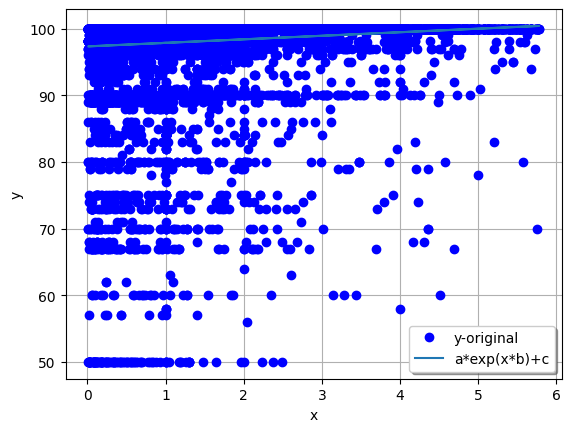

0.00923992430573417

In [151]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['reviews_per_month']]
Var_Dep= df['host_response_rate']

#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

#Modelo exponencial
def func2(x, a, b, c):
    return a*np.exp(b*x)+c

#Ajustamos los parámetros de la función curve_fit
parametros2, covs2= curve_fit(func2, df['reviews_per_month'], df['host_response_rate'])

#Obtenemos los coeficientes del modelo de regresión no lineal
parametros2

#Creamos el modelo de predicción con los parámetros obtenidos 
parametros2, _ = curve_fit(func2, df['reviews_per_month'], df['host_response_rate'])
a2, b2, c2 = parametros2[ 0 ], parametros2[ 1 ], parametros2[ 2 ]
yfit2 = a2*np.exp(x*b2)+c2

#Calculamos las predicciones y reestructuramos el vector de predicciones
#yfit2 = yfit2.reshape(51, 1)
yfit2

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit2, label="a*exp(x*b)+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R2 = r2_score(y, yfit2) 
R2

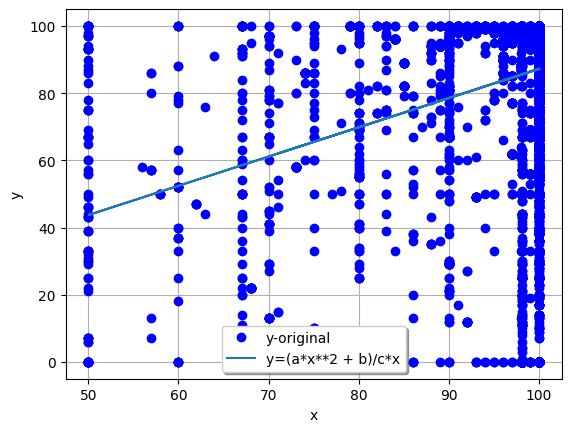

Coeficiente de correlación del modelo:  0.04863068103990231


In [187]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['host_response_rate']]
Var_Dep= df['host_acceptance_rate']

#Redefinimos las variables 
x = Vars_Indep
y = Var_Dep

def func1(x, a, b, c):
    return (a * x**2 + b) / c * x

#Obtenemos los coeficientes del modelo de regresión no lineal
parametros, _ = curve_fit(func1, df['host_response_rate'], df['host_acceptance_rate'])
a, b, c = parametros[0], parametros[1], parametros[2]
yfit1 = (a * x**2 + b) / c * x

#Calculamos las predicciones y reestructuramos el vector de predicciones
#x= x.reshape(51, 1)
#y = y.reshape(51, 1)
#yfit1 = yfit1.reshape(51, 1)
yfit1

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=(a*x**2 + b)/c*x")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R2 = r2_score(y, yfit1) 
print("Coeficiente de correlación del modelo: ", R2)


# Función host_total_listings_count

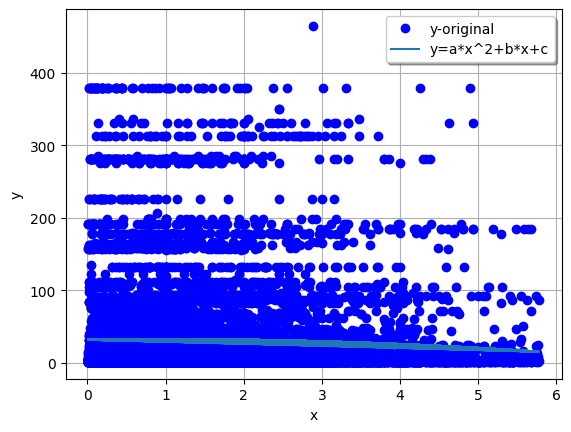

Coeficiente de correlación del modelo:  0.0014462353141846407


In [155]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['reviews_per_month']]
Var_Dep= df['host_total_listings_count']

#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, df['reviews_per_month'], df['host_total_listings_count'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a * x ** 2 + b * x + c

#Calculamos las predicciones y reestructuramos el vector de predicciones
#x= x.reshape(51, 1)
#y = y.reshape(51, 1)
#yfit1 = yfit1.reshape(51, 1)
yfit1

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo

R2 = r2_score(y, yfit1) 
print("Coeficiente de correlación del modelo: ",R2)

/var/folders/b8/jg1xymvs3lsflq9qyj030f0m0000gp/T/ipykernel_56253/849538747.py:14: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros2, covs2= curve_fit(func2, df['host_response_rate'], df['host_total_listings_count'])
/var/folders/b8/jg1xymvs3lsflq9qyj030f0m0000gp/T/ipykernel_56253/849538747.py:20: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros2, _ = curve_fit(func2, df['host_response_rate'], df['host_total_listings_count'])


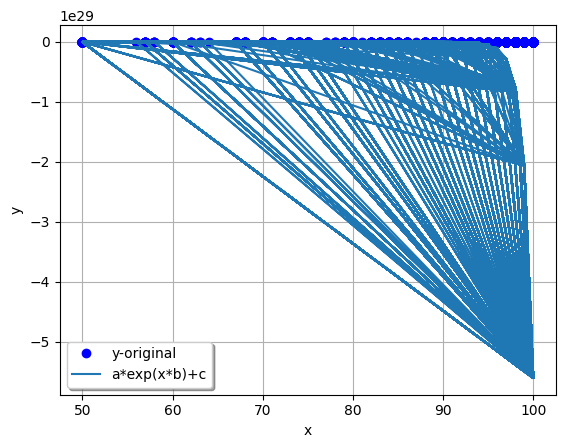

-6.624333403765097e+55

In [156]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['host_response_rate']]
Var_Dep= df['host_total_listings_count']

#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

#Modelo exponencial
def func2(x, a, b, c):
    return a*np.exp(b*x)+c

#Ajustamos los parámetros de la función curve_fit
parametros2, covs2= curve_fit(func2, df['host_response_rate'], df['host_total_listings_count'])

#Obtenemos los coeficientes del modelo de regresión no lineal
parametros2

#Creamos el modelo de predicción con los parámetros obtenidos 
parametros2, _ = curve_fit(func2, df['host_response_rate'], df['host_total_listings_count'])
a2, b2, c2 = parametros2[ 0 ], parametros2[ 1 ], parametros2[ 2 ]
yfit2 = a2*np.exp(x*b2)+c2

#Calculamos las predicciones y reestructuramos el vector de predicciones
#yfit2 = yfit2.reshape(51, 1)
yfit2

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit2, label="a*exp(x*b)+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R2 = r2_score(y, yfit2) 
R2

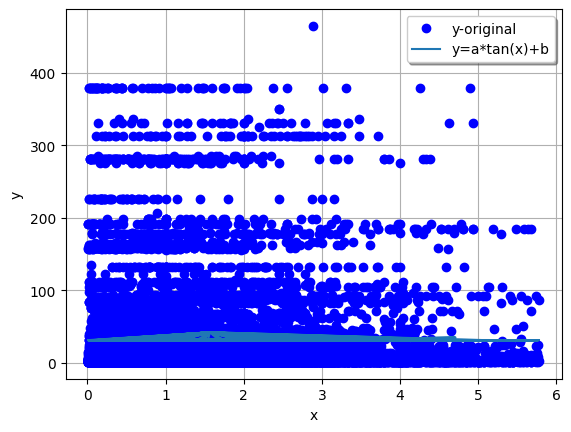

Coeficiente de correlación del modelo:  9.115083452626571e-05


In [190]:
# Declaramos las variables dependientes e independientes para la regresión no lineal
Vars_Indep = df[['reviews_per_month']]
Var_Dep = df['host_total_listings_count']

# Redefinimos las variables
x = Vars_Indep
y = Var_Dep

# Definimos la nueva función
def func1(x, a, b):
    return a * np.tan(x) + b

# Obtenemos los coeficientes del modelo de regresión no lineal
parametros, _ = curve_fit(func1, df['reviews_per_month'], df['host_total_listings_count'])
a, b = parametros[0], parametros[1]
yfit1 = a * np.tan(x) + b

# Calculamos las predicciones y reestructuramos el vector de predicciones
# x = x.reshape(51, 1)
# y = y.reshape(51, 1)
# yfit1 = yfit1.reshape(51, 1)
yfit1

# Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*tan(x)+b")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

# Calculamos el coeficiente de determinación del modelo
R2 = r2_score(y, yfit1)
print("Coeficiente de correlación del modelo: ", R2)




# Función  reviews_per_month

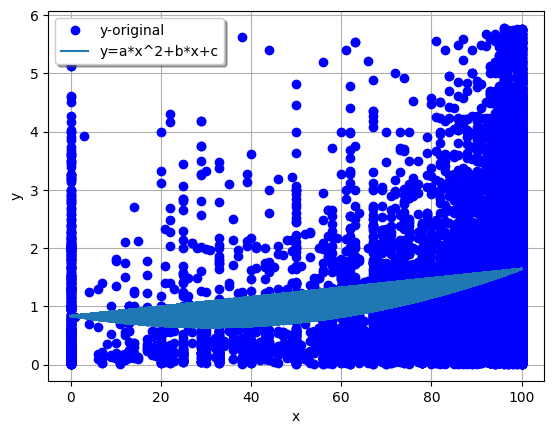

Coeficiente de correlación del modelo:  0.07095158256884604


In [157]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['host_acceptance_rate']]
Var_Dep= df['reviews_per_month']

#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, df['host_acceptance_rate'], df['reviews_per_month'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a * x ** 2 + b * x + c

#Calculamos las predicciones y reestructuramos el vector de predicciones
#x= x.reshape(51, 1)
#y = y.reshape(51, 1)
#yfit1 = yfit1.reshape(51, 1)
yfit1

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo

R2 = r2_score(y, yfit1) 
print("Coeficiente de correlación del modelo: ",R2)

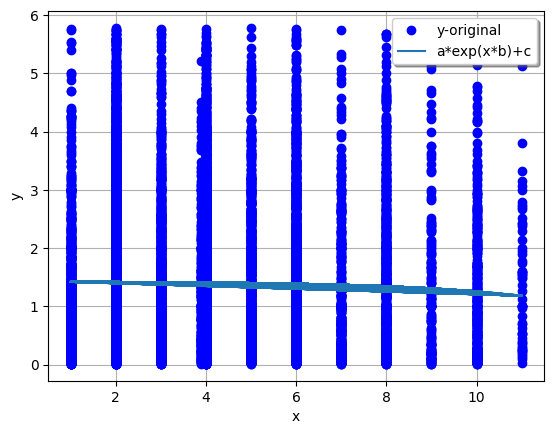

0.0008236333985111033

In [158]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['accommodates']]
Var_Dep= df['reviews_per_month']

#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

#Modelo exponencial
def func2(x, a, b, c):
    return a*np.exp(b*x)+c

#Ajustamos los parámetros de la función curve_fit
parametros2, covs2= curve_fit(func2, df['accommodates'], df['reviews_per_month'])

#Obtenemos los coeficientes del modelo de regresión no lineal
parametros2

#Creamos el modelo de predicción con los parámetros obtenidos 
parametros2, _ = curve_fit(func2, df['accommodates'], df['reviews_per_month'])
a2, b2, c2 = parametros2[ 0 ], parametros2[ 1 ], parametros2[ 2 ]
yfit2 = a2*np.exp(x*b2)+c2

#Calculamos las predicciones y reestructuramos el vector de predicciones
#yfit2 = yfit2.reshape(51, 1)
yfit2

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit2, label="a*exp(x*b)+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R2 = r2_score(y, yfit2) 
R2

In [160]:
correlation_matrix = df.corr()

# Mostrar la matriz de correlación
correlation_matrix

,host_acceptance_rate,host_response_rate,host_total_listings_count,accommodates,reviews_per_month,price
host_acceptance_rate,1.000000,0.220701,0.090006,0.030611,0.235741,-0.017427
host_response_rate,0.220701,1.000000,-0.028885,-0.003659,0.096128,-0.034685
host_total_listings_count,0.090006,-0.028885,1.000000,0.134696,-0.031181,0.039266
accommodates,0.030611,-0.003659,0.134696,1.000000,-0.017952,0.449345
reviews_per_month,0.235741,0.096128,-0.031181,-0.017952,1.000000,-0.095381
price,-0.017427,-0.034685,0.039266,0.449345,-0.095381,1.000000
